# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM 5 Members:** Please EDIT this cell and add the names of all the team members in your team

    HARSH NILESH PATHAK 
    JIDAPA THADAJARASSIRI
    KRUSHIKA TAPEDIA
    PITCHAYA WIRATCHOTISATIAN
    PRINCE SHIVA CHAUDHARY


**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [3]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as first argument
movie_reviews_data_folder = "data/movie_reviews/txt_sentoken/"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [7]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=0)
d_test = docs_test

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.01
             precision    recall  f1-score   support

        neg       0.91      0.88      0.90       254
        pos       0.88      0.91      0.90       246

avg / total       0.90      0.90      0.90       500

[[224  30]
 [ 21 225]]


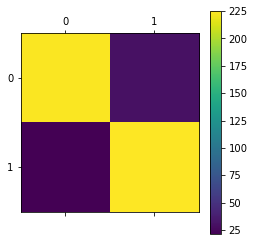

In [5]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.colorbar()
plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

### Define
### The term frequency–inverse document frequency (TF-IDF) statistic

The term frequency–inverse document frequency statistic (tfidf) of a term t in document d (where the set of documents is D) is defined as

$$tfidf(t,d,D) = tf(t,d)*idf(t,D)$$

Where 

The term frequency $tf(t,d)$ is the number of times that term $t$ occurs in document $d$ divided by the number of total words in document $d$. Note that the count of words in document $d$ is weight to avoid an issue that count(t,d) will give more weightage to longer documents than shorter documents. 

The inverse document frequency term measures whether the term is common or rare across all documents. It reduces the weightage of more common words like (the, is, an etc.) which occurs in all document. idf can be defined as the logarithmically scaled inverse fraction of the documents that contain the word. It can be obtained by computing the logarithm of the ratio of the total number of documents to the number of documents containing the term $t$.
$$idf(t,D)=\frac{|D|}{|\{d \in D:t \in d\}|}$$

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms.

### Run the TfidVectorizer class on the training data above

In [6]:
tfidf_vec_defalut = TfidfVectorizer()
X_train_tfidf_defalut = tfidf_vec_defalut.fit_transform(docs_train)
X_train_tfidf_defalut.shape

(1500, 35321)

In [8]:
tfidf_vec_df = TfidfVectorizer(min_df=3, max_df=0.95)
X_train_tfidf_df = tfidf_vec_df.fit_transform(docs_train)
X_train_tfidf_df.shape

(1500, 15921)

min_df and max_df $\in$ [0,1] where the default are 1 and 1.0 respectively. They control the occurrence of terms in a matrix of TF-IDF features by looking at the appearance of terms in documents. 

min_df sets the minimum threshold for the document frequency. The process ignores term $t$ when
* min_df is a float, proportion_of_documents_that_term_t_appears_in < min_df  
* equivalently, min_df is an integer, $|\{d \in D:t \in d\}|$ < min_df. 
<br>It is called cut-off in the literature in which terms that occur in too few documents are ignored. 

max_df sets the maximum threshold for the document frequency. The process ignores terms $t$ when
* max_df is a float, proportion_of_documents_that_term_t_appears_in > max_df and
* equivalently, max_df is an integer, $|\{d \in D:t \in d\}|$ > max_df.
<br>It is known as 'corpus-specific stop words' in which terms that occur in too many documents are ignored. 

When we set min_df=3 and max_df=0.95, terms that appear in less than 3 users' messages (documents) and terms that appear in more than 0.95 of users' messages are ignored. The size of a matrix of X_train_tfidf is much less than the size of X_train_tfidf_default. 

* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [11]:
tfidf_vec_bigram = TfidfVectorizer(ngram_range=[2,2]) # bigram
X_train_tfidf_bigram = tfidf_vec_bigram.fit_transform(docs_train)
X_train_tfidf_bigram.shape

(1500, 396963)

In [12]:
tfidf_vec_1to2gram = TfidfVectorizer(ngram_range=[1,2]) # unigram and bigram conbined
X_train_tfidf_1to2gram = tfidf_vec_1to2gram.fit_transform(docs_train)
X_train_tfidf_1to2gram.shape

(1500, 432284)

ngram_range takes an integer-tuple input, i.e. (min_n, max_n). It specifies the lower and upper boundary of the range of n-terms for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

ngram_range=(1,1) considers unigram terms which are 1-word terms, such as 'I', 'love', 'bunny', and so on.  
<br>
ngram_range=(2,2) considers bigram terms which are 2-word terms, such as 'eat carrot', 'easter egg', 'bunny teeth', and so on.
<br>
ngram_range=(min_n,max_n) considers all n-gram terms in which min_n <= n <= max_n. In our example above, the number of distinct terms in X_train_tfidf when setting ngram_range=(1,2) is equal to the sum of the number of distinct terms in X_train_tfidf_unigram and the number of distinct terms in X_train_tfidf_bigram.

Setting different size of ngram_range changes the size of the X_train_tfidf matrix. The size of the matrix is larger when the absolute difference of max_n and min_n is larger. 

### Further Analysis

In [13]:
min_max_fd_range=np.arange(0.01,1.0,0.01)
predictors_min_df=[TfidfVectorizer(min_df=x).fit_transform(docs_train).shape[1] for x in min_max_fd_range]
predictors_max_df=[TfidfVectorizer(max_df=x).fit_transform(docs_train).shape[1] for x in min_max_fd_range]

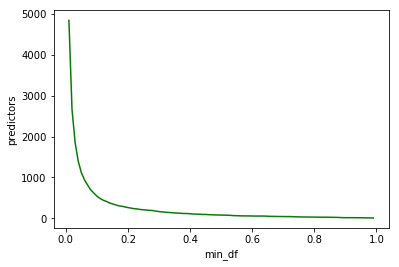

In [14]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.set_xlabel("min_df")
axis.set_ylabel("predictors")
axis.plot(min_max_fd_range, predictors_min_df, color='green')
plt.show()

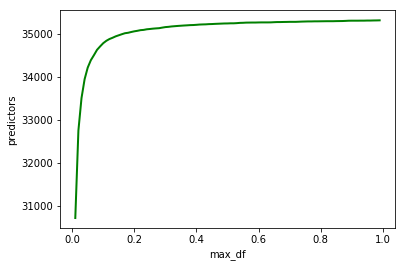

In [15]:
fig1 = plt.figure()
axis = fig1.add_subplot(111)
axis.set_xlabel("max_df")
axis.set_ylabel("predictors")
axis.plot(min_max_fd_range, predictors_max_df, color='green', linewidth=2)
plt.show()

In [17]:
#forming set of n_gram
n= np.arange(1,11,1)
m=[1 for i in range(10)]
parameter=zip(m,n)
predictors_ngram_range=[TfidfVectorizer(ngram_range=i).fit_transform(docs_train).shape[1] for i in parameter]

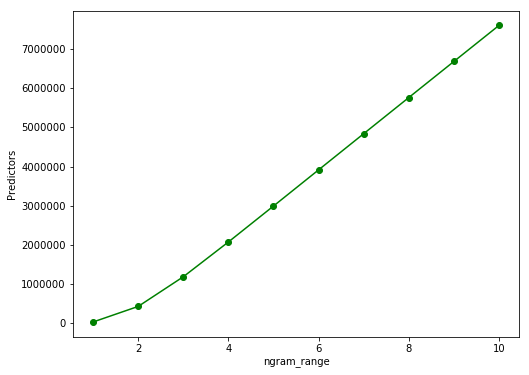

In [18]:
fig=plt.figure(figsize=(8,6))
plt.plot([1,2,3,4,5,6,7,8,9,10],predictors_ngram_range,'g-o')
plt.xlabel('ngram_range')
plt.ylabel('Predictors')
plt.show()

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

### Perform cross validation to choose parameters for TfidfVectorizer using LinearSVC

In [8]:
from sklearn.svm import LinearSVC
pipeline_params = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

parameters = {
    'tfidf__max_df': (0.80, 0.85, 0.90, 0.95),
    'tfidf__min_df': (3, 10, 15, 20),
    'tfidf__ngram_range': [(1,1), (1,2)]
}

grid_search_tune = GridSearchCV(pipeline_params, parameters, n_jobs=-1)
grid_search_tune.fit(docs_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]


In [20]:
y_predicted_params = grid_search_tune.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted_params,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.92      0.87      0.90       254
        pos       0.88      0.92      0.90       246

avg / total       0.90      0.90      0.90       500



In [21]:
print("Best parameters set found on development set:")
print(grid_search_tune.best_params_)

print("Grid scores on development set:")
means = grid_search_tune.cv_results_['mean_test_score']
stds = grid_search_tune.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search_tune.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:
{'tfidf__max_df': 0.8, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}
Grid scores on development set:
0.839 (+/-0.014) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
0.843 (+/-0.027) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}
0.826 (+/-0.016) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 1)}
0.839 (+/-0.013) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 2)}
0.835 (+/-0.011) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 15, 'tfidf__ngram_range': (1, 1)}
0.833 (+/-0.022) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 15, 'tfidf__ngram_range': (1, 2)}
0.824 (+/-0.012) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 20, 'tfidf__ngram_range': (1, 1)}
0.825 (+/-0.014) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 20, 'tfidf__ngram_range': (1, 2)}
0.838 (+/-0.020) for {'tfidf__max_df': 0.85, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 

1. 0.843 (+/-0.027) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}
2. 0.839 (+/-0.013) for {'tfidf__max_df': 0.8, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 2)}
# 2 has lower variance and very close accuracy.

In [36]:
# Set parameters: max_df=0.95, min_df=15, ngram_range=[1, 2]
tfidf_vec_params = TfidfVectorizer(max_df=0.95, min_df=15, ngram_range=[1, 2]) 
# Compute Xtrain
Xtrain_tfidf = tfidf_vec_params.fit_transform(docs_train)
print(Xtrain_tfidf.shape)

# Compute Xtest
Xtest_tfidf = tfidf_vec_params.fit_transform(d_test)
print(Xtest_tfidf.shape)

(1500, 10778)
(500, 3481)


### LinearSVC with different parameters

In [42]:
x_training, x_testing, y_training, y_testing = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=None)

new_vectorizer = TfidfVectorizer(min_df=3,max_df=0.95,ngram_range=(1,2))
Xtrain = new_vectorizer.fit_transform(x_training)
print(Xtrain.shape)

Xtest = new_vectorizer.fit(x_training).transform(x_testing)
print(Xtest.shape)

(1500, 63352)
(500, 63352)


In [43]:


c = [1,100,200,300,400,500,600,700,800,900,1000]
y_predicted = [LinearSVC(C=i,penalty='l2').fit(Xtrain,y_training).predict(Xtest) for i in c]
Accu=[metrics.accuracy_score(y_predicted[i],y_test) for i in range(11)]


In [46]:
precision = [metrics.precision_score(y_predicted[i],y_test) for i in range(11)]
recall = [metrics.recall_score(y_predicted[i],y_test)  for i in range(11)]

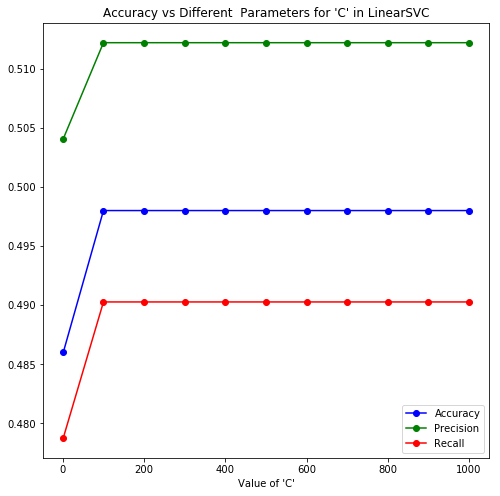

In [47]:
fig = plt.figure(figsize=(8,8))
plt.plot(c,Accu,'-bo',label = "Accuracy")
plt.plot(c,precision,'-go',label="Precision")
plt.plot(c,recall,'-ro',label="Recall")

plt.xlabel("Value of 'C'")
plt.legend()
plt.title("Accuracy vs Different  Parameters for 'C' in LinearSVC")
plt.show()

### KNN with different parameters

accuracy is :-> 0.478
[[148  83]
 [ 71 198]]


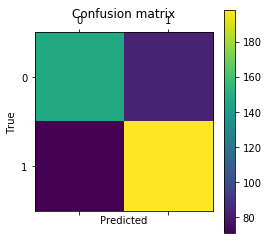

In [49]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=10).fit(Xtrain,y_training)
predicted_clf_KNN = clf_KNN.predict(Xtest)
print("accuracy is :->", np.mean(predicted_clf_KNN==y_test))
cm = metrics.confusion_matrix(y_testing, predicted_clf_KNN)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.title('Confusion matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [45]:
value_of_k=[5,10,50,100,200]
# Train our model for different values of k
predicted_clf_uniform_KNN1=[KNeighborsClassifier(n_neighbors=i, weights='uniform').fit(Xtrain,y_training).predict(Xtest) for i in value_of_k]
predicted_clf_distance_KNN1=[KNeighborsClassifier(n_neighbors=i, weights='distance').fit(Xtrain,y_training).predict(Xtest) for i in value_of_k]

#lets calculate accuracy now
accuracy_uniform_knn=[metrics.accuracy_score(predicted_clf_uniform_KNN1[i],y_testing) for i in range(5)]
accuracy_distance_knn=[metrics.accuracy_score(predicted_clf_distance_KNN1[i],y_testing) for i in range(5)]


#print(y_testing)
#print(predicted_clf_distance_KNN1[1])
#print(metrics.classification_report(y_testing, accuracy_uniform_knn[1],target_names=data_set.target_names))

score_uniform_knn = [metrics.f1_score(predicted_clf_uniform_KNN1[i],y_testing) for i in range(5)]
score_distance_knn = [metrics.f1_score(predicted_clf_distance_KNN1[i],y_testing) for i in range(5)]

precision_uniform_knn = [metrics.precision_score(predicted_clf_uniform_KNN1[i],y_testing) for i in range(5)]
precision_distance_knn = [metrics.precision_score(predicted_clf_distance_KNN1[i],y_testing) for i in range(5)]


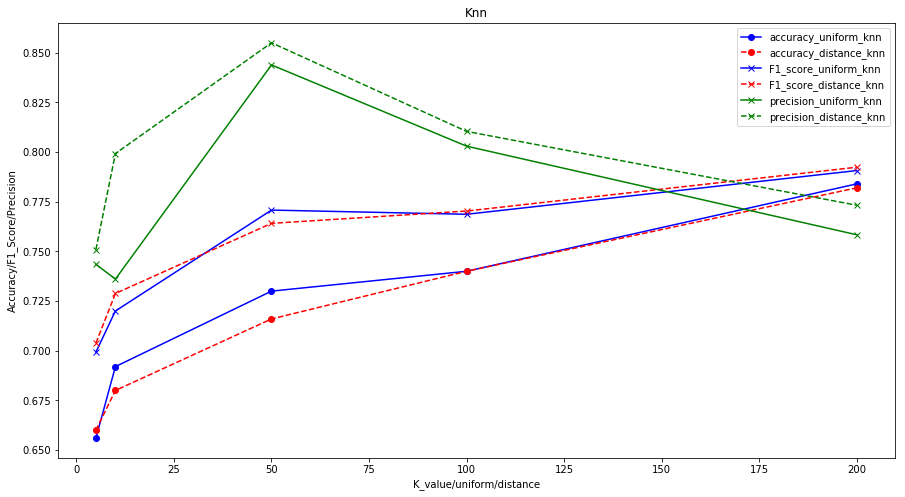

In [48]:
#Lets plot results
fig=plt.figure(figsize=(15,8))
#plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], accuracy_knn, 'bo-')
plt.title('Knn')
plt.plot([5,10,50,100,200], accuracy_uniform_knn, 'bo-', label = "accuracy_uniform_knn")
plt.plot([5,10,50,100,200], accuracy_distance_knn, 'ro--',label = "accuracy_distance_knn")
plt.plot([5,10,50,100,200], score_uniform_knn, 'bx-',label = "F1_score_uniform_knn")
plt.plot([5,10,50,100,200], score_distance_knn, 'rx--',label = "F1_score_distance_knn")
plt.plot([5,10,50,100,200], precision_uniform_knn, 'gx-',label = "precision_uniform_knn")
plt.plot([5,10,50,100,200], precision_distance_knn, 'gx--',label = "precision_distance_knn")
plt.legend()
plt.ylabel('Accuracy/F1_Score/Precision')
plt.xlabel('K_value/uniform/distance')
plt.show()

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [9]:
import nltk
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

token_dict = {}
for i in range(len(dataset.data)):
    text = dataset.data[i].decode("ISO-8859-1")
    no_punctuation = text.translate(str.maketrans('','',string.punctuation))
    token_dict[i] = no_punctuation
        
tfidf = TfidfVectorizer(max_df=grid_search_tune.best_params_['tfidf__max_df'],
                        min_df=grid_search_tune.best_params_['tfidf__min_df'], 
                        ngram_range=grid_search_tune.best_params_['tfidf__ngram_range'], 
                        tokenizer=tokenize, 
                        stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

In [51]:
train_dict = {}
for i in range(len(docs_train)):
    text = docs_train[i].decode("ISO-8859-1")
    no_punctuation = text.translate(str.maketrans('','',string.punctuation))
    train_dict[i] = no_punctuation
        
tfidf_train = TfidfVectorizer(max_df=grid_search_tune.best_params_['tfidf__max_df'],
                        min_df=grid_search_tune.best_params_['tfidf__min_df'], 
                        ngram_range=grid_search_tune.best_params_['tfidf__ngram_range'], 
                        tokenizer=tokenize, 
                        stop_words='english')
tfs_train = tfidf.fit_transform(train_dict.values())

In [52]:
# Preprocessing on docs_test
test_dict = {}
for i in range(len(docs_test)):
    text = docs_test[i].decode("ISO-8859-1")
    no_punctuation = text.translate(str.maketrans('','',string.punctuation))
    test_dict[i] = no_punctuation
        
tfidf_test = TfidfVectorizer(max_df=grid_search_tune.best_params_['tfidf__max_df'],
                        min_df=grid_search_tune.best_params_['tfidf__min_df'], 
                        ngram_range=grid_search_tune.best_params_['tfidf__ngram_range'], 
                        tokenizer=tokenize, 
                        stop_words='english')
tfs_test = tfidf.fit_transform(test_dict.values())

## Feature selection: Lasso and Matrix Decomposition

In [55]:
from sklearn.linear_model import LogisticRegression
import numpy as np
c_grid = np.arange(0.001,1,0.001)
# create and fit a lasso logistic regression model
model = LogisticRegression( penalty = 'l1')
clf_log = GridSearchCV(estimator=model,param_grid=dict(C=c_grid), cv = 5)
clf_log.fit(tfs_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.001,  0.002, ...,  0.998,  0.999])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

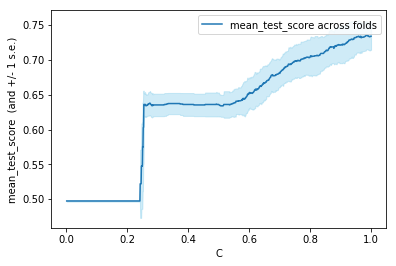

In [57]:
import math
rates = clf_log.cv_results_['mean_test_score']
stds = clf_log.cv_results_['std_test_score']

plt.fill_between(c_grid, rates - stds, rates + stds, color = 'skyblue',alpha = .4)
plt.plot(c_grid, rates, '-', label = 'mean_test_score across folds')
plt.xlabel('C')
plt.ylabel('mean_test_score  (and +/- 1 s.e.)')
plt.legend(loc = 'best')
plt.show()

In [59]:
# summarize the results of the grid search
print(clf_log.best_estimator_.C)

0.983


In [60]:
logreg = LogisticRegression(C=clf_log.best_estimator_.C,fit_intercept=True,penalty='l1',solver='liblinear')
logreg.fit(tfs,dataset.target)

LogisticRegression(C=0.98299999999999998, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [61]:
logreg_index=np.nonzero(logreg.coef_)[1]
print(len(logreg_index),logreg_index)

50 [ 1228  1434  1564  2322  2663  2951  3002  3517  4132  4821  7699  9711
 10490 11040 11481 14166 14581 15262 17374 19309 20208 20450 21152 23062
 23281 23790 24260 25332 25368 26120 26355 26389 27346 28559 29864 30027
 32718 32978 34438 34823 34997 35041 35464 35931 36569 36651 37041 37084
 37677 37766]


In [62]:
 # Grid search for tuning parameter alpha
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas2 = [0.001,0.002,0.005,0.01,0.05,0.1,0.5,1]
# create and fit a lasso regression model, testing each alpha
model = Lasso(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas2))
grid.fit(tfs, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
0.0538014091443
0.001


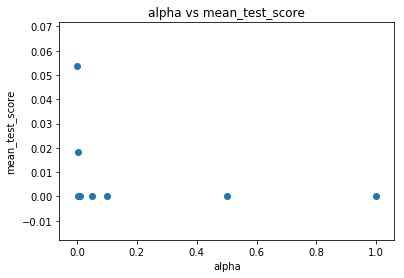

In [63]:
plt.scatter(alphas2,grid.cv_results_['mean_test_score'])
plt.title("alpha vs mean_test_score")
plt.xlabel("alpha")
plt.ylabel("mean_test_score")
plt.show()

In [64]:
 # Lasso
from sklearn import model_selection, linear_model, feature_selection, metrics
regLasso = linear_model.Lasso(alpha=0.002,fit_intercept=True,normalize=True)
regLasso.fit(tfs,dataset.target)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso_index=[]
print("intercept",regLasso.intercept_)
for i in range(len(regLasso.coef_)):
    if(regLasso.coef_[i]!=0): 
        lasso_index.append(i)
        print(i,regLasso.coef_[i])

intercept 0.541333816533
2663 -2.48012759379
32718 -0.0230871888335
32978 -0.603681712815
36651 -1.16011679109
37766 -0.638490146206


## Decomposition TruncatedSVD

In [66]:

from sklearn.decomposition.truncated_svd import TruncatedSVD
from sklearn.preprocessing import StandardScaler
# feature extraction
pca = TruncatedSVD(n_components=2)
fit_pca = pca.fit(tfs[:,lasso_index])
# summarize components
print("Explained Variance: %s" % fit_pca.explained_variance_ratio_)
print(fit_pca.components_)

Explained Variance: [ 0.40631307  0.17992201]
[[ 0.88544791  0.25660687  0.20850078  0.20194228  0.25667421]
 [-0.45983996  0.57108939  0.4083994   0.26665438  0.47382434]]


In [67]:
dataset_target = [str(i) for i in dataset.target]
for i in range(len(dataset.target)):
    if(dataset.target[i]==0):
        dataset_target[i]='neg'
    else:
        dataset_target[i]='pos'

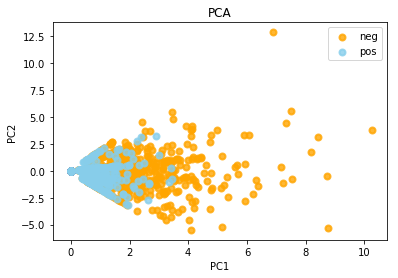

In [68]:
X_proj = pca.fit_transform(StandardScaler(with_mean=False).fit_transform(tfs[:,lasso_index]))

colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_proj[dataset.target == i, 0], X_proj[dataset.target == i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Parallel Plot

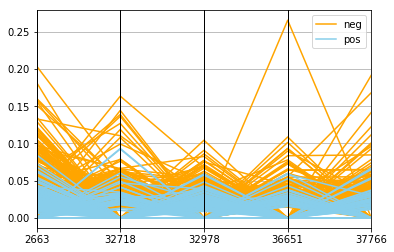

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
from scipy.sparse import csr_matrix
tfs_lasso = tfs[:,lasso_index].todense()
df_tfs_lasso=pd.DataFrame(data=tfs_lasso,columns=[str(x) for x in lasso_index]) 
df_tfs_lasso['class']=dataset_target
parallel_coordinates(df_tfs_lasso,'class',color=colors)
plt.show()

## MDS on COSINE distanse

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

dist = 1 - cosine_similarity(tfs)
dist.shape

(2000, 2000)

In [92]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds_cosine = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
# Specify random_state makes it reproducible.
# Plotting points in a two-dimensional plane (2 components) 

position = mds_cosine.fit_transform(dist)  # shape (n_components, n_samples)

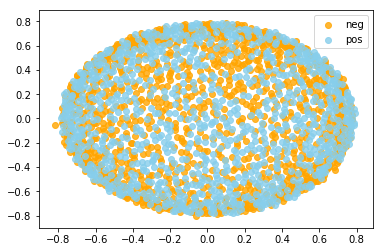

In [93]:
xs, ys = position[:, 0], position[:, 1]

colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(xs[dataset.target == i], ys[dataset.target == i], 
                color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best')
plt.show()

In [74]:
# Feature Extraction with PCA
from sklearn.decomposition.truncated_svd import TruncatedSVD
# feature extraction
tsvd = TruncatedSVD(n_components=256)
fit = tsvd.fit(tfs_train.toarray())
# summarize components
print("Explained Variance: %s" % sum(fit.explained_variance_ratio_))
fc = fit.components_

Explained Variance: 0.362840669057


In [76]:
print(fc.shape)

(256, 28393)


In [80]:
mds_cosine = MDS(n_components=2, random_state=0)
# Specify random_state makes it reproducible.
# Plotting points in a two-dimensional plane (2 components) 

position = mds_cosine.fit_transform(fc)  # shape (n_components, n_samples)

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


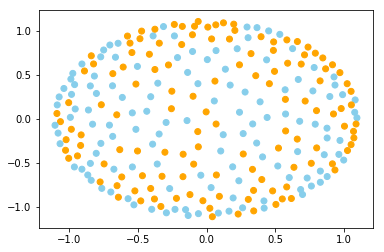

In [91]:
xs2, ys2 = position[:, 0], position[:, 1]

colors = ['orange', 'skyblue']
color = ['orange', 'skyblue']
plt.scatter(xs2,ys2,color=colors, cmap=plt.cm.Spectral)
plt.legend(loc='best')
plt.show()

## K-means Clustering


In [89]:
from sklearn.cluster import KMeans
k=2
km = KMeans(n_clusters=k)
km.fit(tfs)
clusters = km.labels_.tolist()

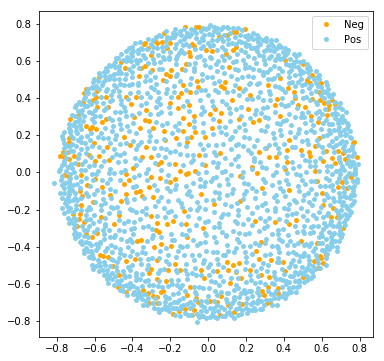

In [94]:
#set up colors per clusters using a dict
cluster_colors = {0: 'orange', 1: 'skyblue'}
#set up cluster names using a dict
cluster_names = {0: 'Neg', 1: 'Pos'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(6, 6)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
ax.legend(numpoints=1)  #show legend with only 1 point
plt.show() 
#plt.savefig('?.png', dpi=200)

##  Hierarchical Clustering: Clustering based on the distances between texts

In [95]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

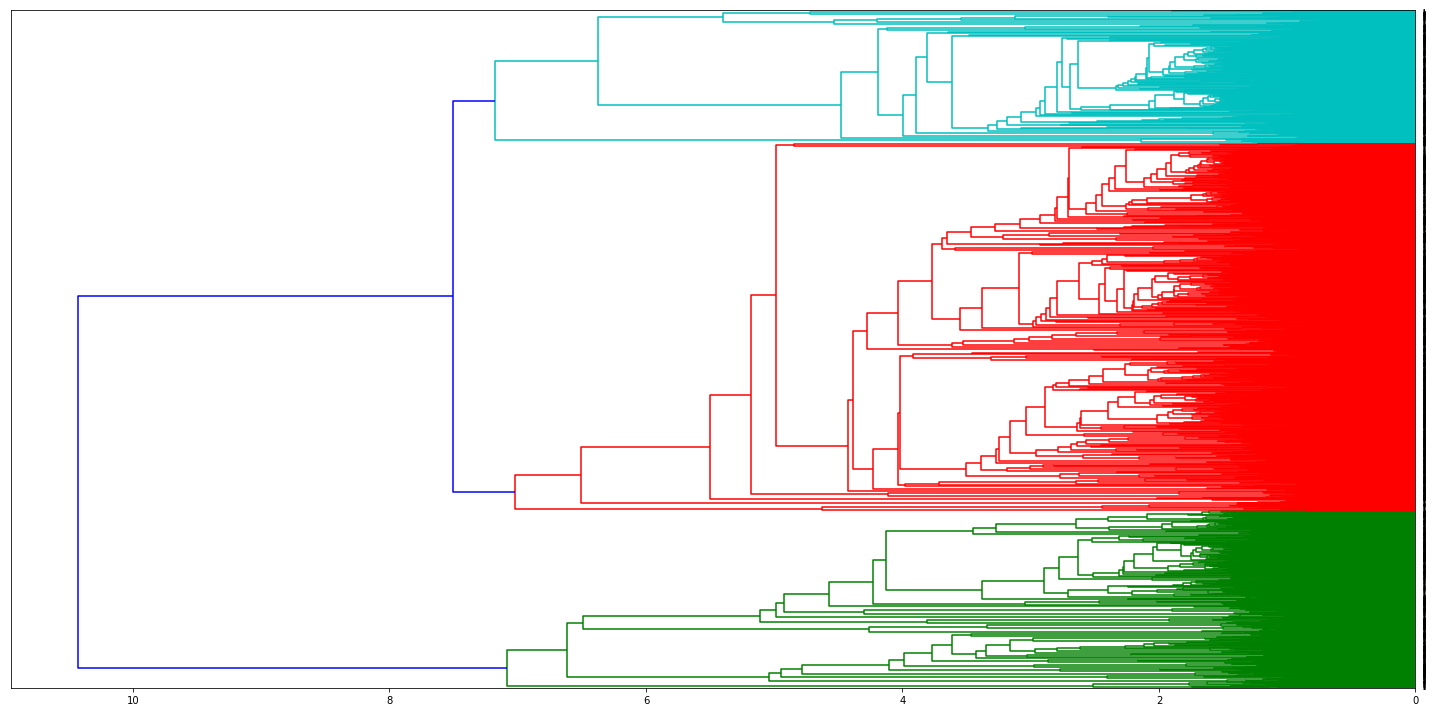

In [96]:
 # create dendrogram
plt.subplots(figsize=(20, 10))
dendrogram(linkage_matrix, orientation="left", labels=dataset.target)
plt.tight_layout()  # fixes margins
plt.show()
file_names=[i[36:][:-4] for i in dataset.filenames]

In [97]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# generate the linkage matrix
lk = linkage(dist, 'ward')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c_val, coph_dists = cophenet(lk, pdist(dist))
c_val # How good is this cluster?

0.27774768446344733

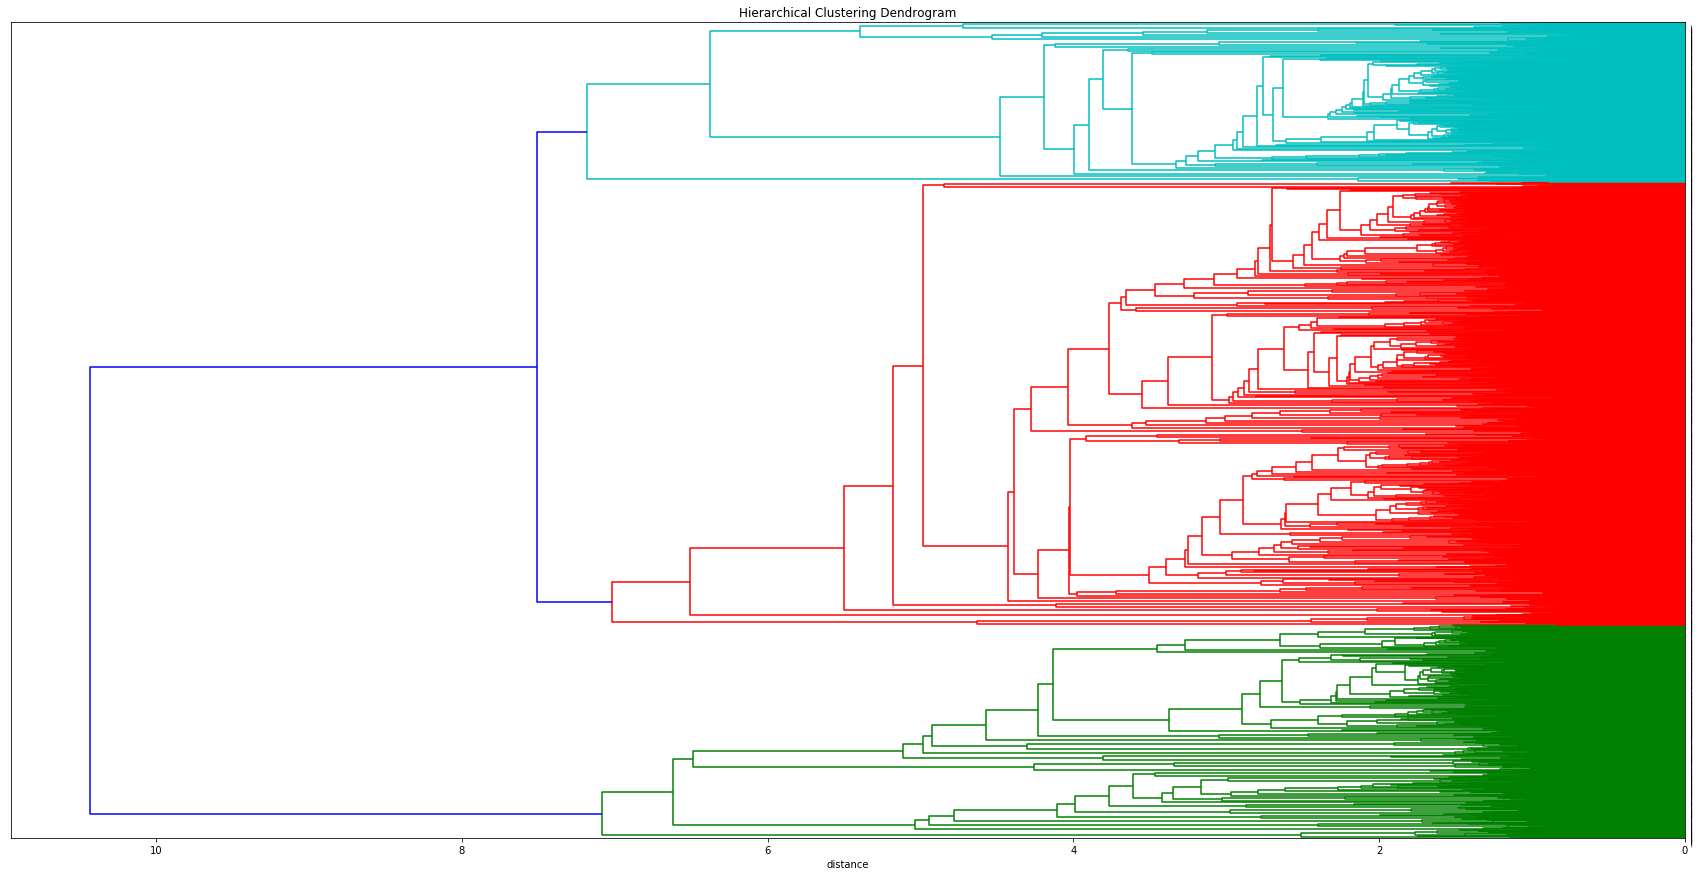

In [98]:
plt.figure(figsize=(30, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
den = dendrogram(lk,
                 leaf_rotation=90.,  # rotates the x axis labels
                 leaf_font_size=1.,  # font size for the x axis labels
                 labels=file_names,
                 orientation="left",
)
plt.savefig('ward_clusters.png', dpi=200)
plt.show()

In [99]:
from matplotlib.colors import rgb2hex, colorConverter
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [100]:
from collections import defaultdict
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [101]:
plt.figure(figsize=(30, 15))
den = dendrogram(lk, labels=file_names)
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('dendrogram.png');

In [ ]:
get_cluster_classes(den)

g
r
c


## Manifold methods

In [ ]:
 # full data set
from sklearn.manifold import TSNE
# t-SNE embedding 
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(tfs.todense())

In [ ]:
# Plot result from above
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[dataset.target==i, 0], X_tsne[dataset.target==i, 1], color=color, 
                alpha=1, lw=1, marker='o',
                label=target_name)
plt.title('t-SNE embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
 # Truncated set
# t-SNE embedding 
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(fc.todense())

In [ ]:
# Plot result from above
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[dataset.target==i, 0], X_tsne[dataset.target==i, 1], color=color, 
                alpha=1, lw=1, marker='o',
                label=target_name)
plt.title('t-SNE embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
# lasso set
# t-SNE embedding 
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(tfs[:,logreg_index].todense())

colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[dataset.target==i, 0], X_tsne[dataset.target==i, 1], 
                color=color, alpha=.8, lw=1,
                label=target_name)
plt.title('t-SNE embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
# Spectral embedding on the full data
from sklearn.manifold import SpectralEmbedding
embedder = SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
X_se = embedder.fit_transform(tfs.todense())
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_se[dataset.target==i, 0], X_se[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Spectral embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
# Spectral embedding 
from sklearn.manifold import SpectralEmbedding
embedder = SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
X_se = embedder.fit_transform(tfs[:,lasso_index].todense())
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_se[dataset.target==i, 0], X_se[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Spectral embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
# Spectral embedding 
from sklearn.manifold import SpectralEmbedding
embedder = SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
X_se = embedder.fit_transform(tfs[:,logreg_index].todense())
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_se[dataset.target==i, 0], X_se[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Spectral embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import SpectralEmbedding
embedder = SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
X_se = embedder.fit_transform(dist)
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_se[dataset.target==i, 0], X_se[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Spectral embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
# On the full data
from sklearn.ensemble import RandomTreesEmbedding
hasher = RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(tfs)
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[dataset.target==i, 0], X_reduced[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Random Trees embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import RandomTreesEmbedding
hasher = RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(tfs[:,lasso_index])
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[dataset.target==i, 0], X_reduced[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Random Trees embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import RandomTreesEmbedding
hasher = RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(tfs[:,logreg_index])
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
colors = ['orange', 'skyblue']
target_names = ['neg', 'pos']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[dataset.target==i, 0], X_reduced[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Random Trees embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import MDS
clf_mds = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf_mds.fit_transform(tfs[:,lasso_index].todense())

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_mds[dataset.target==i, 0], X_mds[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('MDS embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import MDS
clf_mds = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf_mds.fit_transform(tfs[:,logreg_index].todense())

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_mds[dataset.target==i, 0], X_mds[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('MDS embedding')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=100, n_components=2).fit_transform(tfs[:,lasso_index].todense())

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_iso[dataset.target==i, 0], X_iso[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Isomap projection')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=100, n_components=2).fit_transform(tfs[:,logreg_index].todense())

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_iso[dataset.target==i, 0], X_iso[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Isomap projection')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=100, n_components=2).fit_transform(dist)

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_iso[dataset.target==i, 0], X_iso[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Isomap projection')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.manifold import Isomap
#truncated svd
X_iso = Isomap(n_neighbors=100, n_components=2).fit_transform(fc)

colors = ['orange', 'skyblue']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_iso[dataset.target==i, 0], X_iso[dataset.target==i, 1], 
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.title('Isomap projection')
plt.legend(loc='best')
plt.show()

In [ ]:
X_r, err = manifold.locally_linear_embedding(fc, n_neighbors=2, n_components=2)

plt.axis('tight')
plt.scatter(X_r[:, 0], X_r[:, 1] , c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **